In [1]:
import pandas as pd
## - Import "Grocery.csv"
grocery = pd.read_csv('Grocery.csv')
print("The five first row of the dataset are:\n", grocery.head())

The five first row of the dataset are:
   TransactionID CustomerID Transaction_Status        Item   Price  Quantity
0         T0001       C036     not successful  Headphones   150.0       3.0
1         T0002       C037     not successful  Smartphone   800.0       3.0
2         T0003       C085     not successful      Laptop  1200.0       5.0
3         T0004       C063         successful     Monitor   300.0       1.0
4         T0005       C035         successful      Laptop  1200.0       2.0


In [2]:
### - Find all the duplicates rows.
print("The rows of the dataset with duplicates are:\n", grocery.duplicated())
## - Find the number of duplicate rows.
print("\nThe number of duplicates rows is:", grocery.duplicated().sum())

The rows of the dataset with duplicates are:
 0      False
1      False
2      False
3      False
4      False
       ...  
525     True
526     True
527     True
528     True
529     True
Length: 530, dtype: bool

The number of duplicates rows is: 30


In [3]:
## - Select duplicates rows based on TransactionID column.
grocery1 = grocery[grocery.duplicated('TransactionID')]
print("\nThe rows of the dataset with duplicates are:\n", grocery1)


The rows of the dataset with duplicates are:
     TransactionID CustomerID Transaction_Status        Item   Price  Quantity
500         T0049       C073     not successful     Monitor   300.0       2.0
501         T0320       C045         successful       Mouse    30.0       3.0
502         T0351       C012     not successful     Monitor   300.0       5.0
503         T0225       C063     not successful     Monitor   300.0       1.0
504         T0426       C012     not successful     Monitor   300.0       4.0
505         T0172       C004         successful    Keyboard    60.0       5.0
506         T0332       C011     not successful      Laptop  1200.0       5.0
507         T0343       C076     not successful      Laptop  1200.0       3.0
508         T0167       C096         successful     Printer   200.0       5.0
509         T0370       C048     not successful       Mouse    30.0       4.0
510         T0277       C029         successful    Keyboard    60.0       5.0
511         T0014

In [4]:
## - Drop duplicate rows.
grocery.drop_duplicates(inplace = True)

In [5]:
## - Verify duplicates are dropped.
print('\nDuplicates still present = ', grocery.duplicated().any())
print("\nThe number of duplicates rows is:", grocery.duplicated().sum())


Duplicates still present =  False

The number of duplicates rows is: 0


In [6]:
## - Get the total NaN count per column.
print("\nThe missing values per column are:\n", grocery.isna().sum())


The missing values per column are:
 TransactionID          0
CustomerID             0
Transaction_Status     3
Item                   0
Price                 48
Quantity              47
dtype: int64


In [7]:
## - Fill NaN values in Price column with mean value.
grocery['Price'] = grocery['Price'].fillna(grocery['Price'].mean())

In [8]:
## - Fill NaN values in Transaction_Status column with the mode value.
grocery['Transaction_Status'] = grocery['Transaction_Status'].fillna(grocery['Transaction_Status'].mode()[0])

In [9]:
## - Fill NaN values in Quantity column with value of 1
grocery['Quantity'] = grocery['Quantity'].fillna(1)


In [10]:
## - Verify imputing was successful.
print("\nVerify if we still have missing values per column:\n", grocery.isna().sum())


Verify if we still have missing values per column:
 TransactionID         0
CustomerID            0
Transaction_Status    0
Item                  0
Price                 0
Quantity              0
dtype: int64


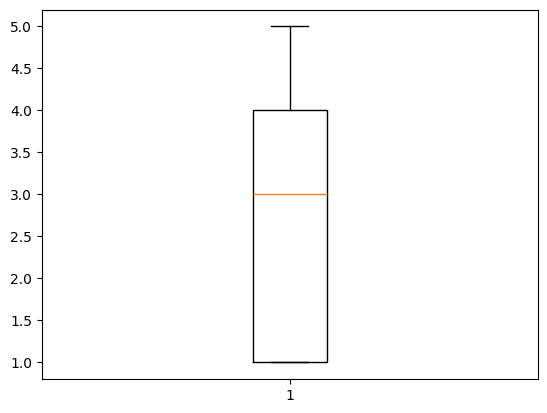

In [11]:
## - Using boxplot, plot the Quantity column.
import matplotlib.pyplot as plt

plt.boxplot(grocery['Quantity'])
plt.show()

In [12]:
## - Using z-score, calculate the z-score for the Quantity column. Use a threshod value of 1. Print the outliers rows.
import numpy as np
from scipy import stats

## 16 - Calculate the z-score.
z = np.abs(stats.zscore(grocery['Quantity']))
# Define a threshold for outliers
threshold = 1

# Find outliers
outlier = np.where(z > threshold)[0]
print('\nOutlier are in rows:', outlier)


Outlier are in rows: [  2   3   8  11  12  14  15  16  23  24  25  27  28  29  30  37  39  40
  43  44  45  46  47  49  50  52  55  58  59  60  67  69  70  71  72  73
  75  77  78  79  80  87  88  89  93  94  95  97  98  99 100 101 103 107
 108 110 111 113 117 120 124 127 135 136 139 140 141 144 146 149 150 155
 165 166 170 171 173 174 175 176 179 180 186 187 188 192 193 194 195 199
 200 201 202 203 204 205 206 209 210 212 218 219 222 224 226 227 232 233
 234 238 239 240 242 243 244 245 249 253 254 257 258 259 260 262 263 269
 271 273 274 275 276 278 283 285 289 291 293 294 296 299 300 301 303 305
 306 313 315 317 322 323 324 327 328 331 332 335 337 341 344 345 346 348
 349 350 355 356 358 363 365 367 368 370 377 380 382 386 388 389 390 391
 392 393 394 398 399 402 409 414 417 418 419 421 423 427 428 431 432 434
 435 436 437 439 442 444 446 451 454 456 458 461 468 469 470 474 476 477
 479 483 486 487 488 494 495 496 498]


In [13]:
## - Drop the outliers.
grocery = grocery.drop(outlier)

In [14]:
## - Print the new dataset (without outliers).
print("\nThe new data set without ouliers are:\n", grocery)


The new data set without ouliers are:
     TransactionID CustomerID Transaction_Status        Item        Price  \
0           T0001       C036     not successful  Headphones   150.000000   
1           T0002       C037     not successful  Smartphone   800.000000   
4           T0005       C035         successful      Laptop  1200.000000   
5           T0006       C079         successful  Smartphone   800.000000   
6           T0007       C060         successful     Monitor   300.000000   
..            ...        ...                ...         ...          ...   
491         T0492       C031     not successful       Mouse    30.000000   
492         T0493       C089         successful       Mouse   392.433628   
493         T0494       C012         successful     Monitor   300.000000   
497         T0498       C016     not successful      Laptop  1200.000000   
499         T0500       C052     not successful  Headphones   150.000000   

     Quantity  
0         3.0  
1         3.0  

In [15]:
## - Handling inconsistent data: Convert Transaction_Status to title case.
grocery['Transaction_Status'] = grocery['Transaction_Status'].str.title()

In [16]:
## - Display the cleaned dataframe.
print("\nThe cleaned data set is:\n", grocery)


The cleaned data set is:
     TransactionID CustomerID Transaction_Status        Item        Price  \
0           T0001       C036     Not Successful  Headphones   150.000000   
1           T0002       C037     Not Successful  Smartphone   800.000000   
4           T0005       C035         Successful      Laptop  1200.000000   
5           T0006       C079         Successful  Smartphone   800.000000   
6           T0007       C060         Successful     Monitor   300.000000   
..            ...        ...                ...         ...          ...   
491         T0492       C031     Not Successful       Mouse    30.000000   
492         T0493       C089         Successful       Mouse   392.433628   
493         T0494       C012         Successful     Monitor   300.000000   
497         T0498       C016     Not Successful      Laptop  1200.000000   
499         T0500       C052     Not Successful  Headphones   150.000000   

     Quantity  
0         3.0  
1         3.0  
4         2.